# Logistic Regression 실습 01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]

fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [5]:
X = np.hstack((pass_time, fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [6]:
# y
y1 = [1] * len(pass_time)
y0 = [0] * len(fail_time)

y = np.hstack((y1, y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
X.shape, y.shape

((35,), (35,))

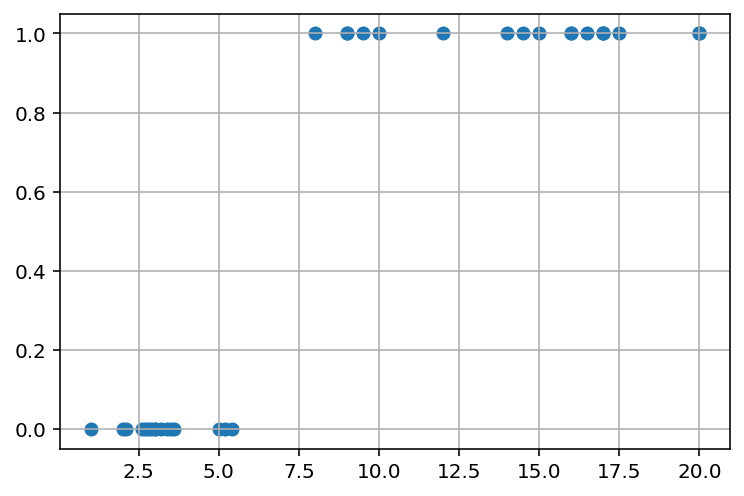

In [10]:
# 시각화
plt.scatter(X, y)
plt.grid()

In [11]:
model = LogisticRegression()

model.fit(X.reshape(-1, 1), y)

model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [16]:
# 예측 분류
model.predict([[6.9]])

array([0])

In [18]:
# 예측 확률
model.predict_proba([[6.9]])

array([[0.50294437, 0.49705563]])

In [ ]:
# 결과 시각화 는 내일 이어서...